## Deploy Parte 1
<br>
    Nesse trabalho será realizado um projeto com duas bases: uma que será utilizada durante a criação do modelo e outra que seria a base com novos dados forncecida pelo clinete após o modelo já estar em produção.
  <br>  - Vamos **determinar o modelo** utilizando os dados disponíveis no arquivo `dadosVenda.xlsx`
  <br>  - Depois do modelo exportado, vamos utilizar os dados em `dadosVenda_producao.xlsx`

- Para simplificar, vamos usar a Regressão Linear diretamente

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando nossa base
base = pd.read_excel('dadosVenda.xlsx')

In [3]:
# Visualizando a base
base.head()

,IDRegistro,PrecoOriginal,Desconto,VendaQtd
0,1,23,1.15,81
1,2,5,0.70,3361
2,3,15,1.35,1551
3,4,7,2.03,3036
4,5,10,0.40,2436


In [4]:
# Verificando se existem valores vazios
base.isnull().sum()

# tratando esses valores
base.loc[base.Desconto.isnull(), 'Desconto'] = 0

In [5]:
# Separando X e y
X = base[['PrecoOriginal', 'Desconto']]
y = base.VendaQtd

**Separando em treino e teste**

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Criando o modelo**

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [9]:
# Fazendo a previsao
y_pred = reg.predict(X_test)

**Avaliando o modelo**

In [10]:
# Importando o metrics do sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
# Avaliando o erro médio absoluto
mean_absolute_error(y_test, y_pred)

0.25078643242467186

In [12]:
# Avaliando o erro médio quadrático
mean_squared_error(y_test, y_pred)

0.0854790321083994

**Verificar graficamente a relação entre y_test x y_pred**

In [13]:
import matplotlib.pyplot as plt

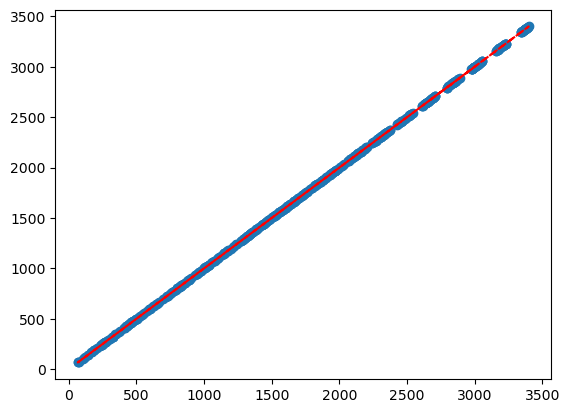

In [14]:
# Traçando o gráfico de y_test x y_pred
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred)
ax.plot(y_test, y_pred, '--r')

plt.show()

In [15]:
# Verificando o coef_
reg.coef_

array([-182.99973759,   31.00151165])

In [16]:
# E então o intercept_
reg.intercept_

4253.997131672601

**Persistindo o nosso modelo**

In [17]:
# Importando o dump do joblib
from joblib import dump

In [18]:
# E então fazendo o dump do nosso modelo
dump(reg, 'regressor.joblib')

['regressor.joblib']